# Generate test cases

In [ ]:
import random

num_vertices = 200 #=================================>>>>>>>>>>>> vary this

def generate_random_graph(num_vertices, num_edges=None):
    # Ensure we don't have more edges than possible in a simple graph
    max_edges = num_vertices * (num_vertices - 1) // 2
    num_edges = num_edges if num_edges else random.randint(num_vertices - 1, max_edges)

    edges = set()

    while len(edges) < num_edges:
        u, v = random.sample(range(num_vertices), 2)
        edges.add(tuple(sorted((u, v))))

    return list(edges)

def save_graph_to_file(graph_edges, num_vertices, filename_template="graph_{num_vertices}.txt"):
    filename = filename_template.format(num_vertices=num_vertices)

    with open(filename, "w") as file:
        for edge in graph_edges:
            file.write(f"{edge}\n")

random_graph_edges = generate_random_graph(num_vertices)
save_graph_to_file(random_graph_edges, num_vertices)
print(f"Graph saved to 'graph_{num_vertices}.txt'.")


Graph saved to 'graph_200.txt'.


# Running GA and WOC

Generation 1: Best Fitness = 691713
Generation 2: Best Fitness = 554522
Generation 3: Best Fitness = 513325
Generation 4: Best Fitness = 486927
Generation 5: Best Fitness = 486927
Generation 6: Best Fitness = 486927
Generation 7: Best Fitness = 446330
Generation 8: Best Fitness = 446330
Generation 9: Best Fitness = 446330
Generation 10: Best Fitness = 446330
Generation 11: Best Fitness = 446330
Generation 12: Best Fitness = 434931
Generation 13: Best Fitness = 408733
Generation 14: Best Fitness = 383735
Generation 15: Best Fitness = 383335
Generation 16: Best Fitness = 371536
Generation 17: Best Fitness = 324340
Generation 18: Best Fitness = 324340
Generation 19: Best Fitness = 324340
Generation 20: Best Fitness = 313741
Generation 21: Best Fitness = 303342
Generation 22: Best Fitness = 292943
Generation 23: Best Fitness = 272545
Generation 24: Best Fitness = 272545
Generation 25: Best Fitness = 243148
Generation 26: Best Fitness = 242548
Generation 27: Best Fitness = 233549
Generation

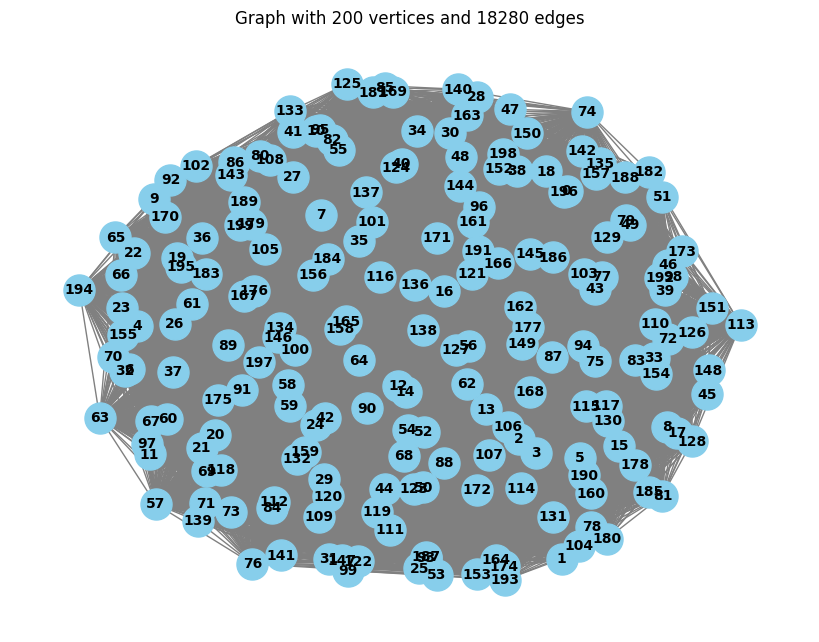

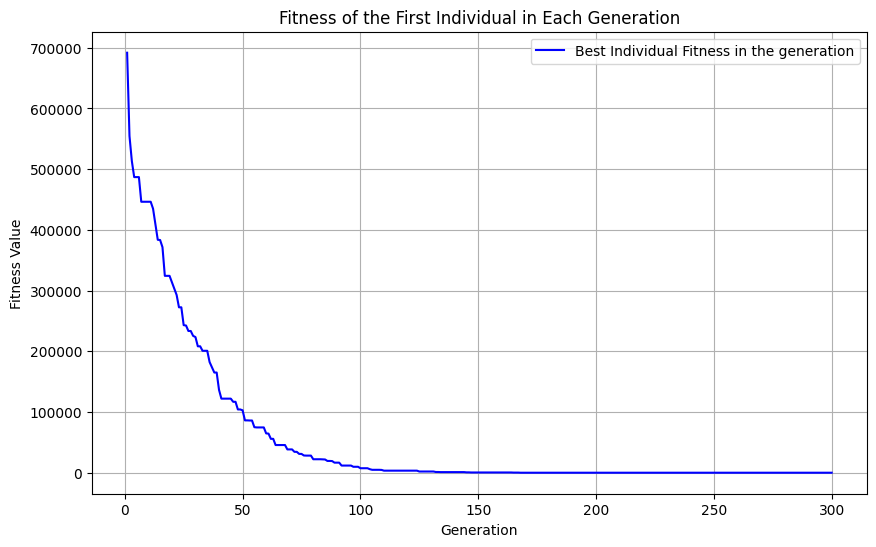

In [ ]:
import random
import numpy as np
import math
import networkx as nx
import matplotlib.pyplot as plt

NUM_VERTICES = 200 #===============================================>>>>>>>>>>>>> vary this
POP_SIZE = 100  # Population size
GENS = 300  # Number of generations
PM = 0.01  # Mutation probability
TOP_PERCENTAGE = 0.2  # Percentage of population to retain as experts


def visualize_graph(num_vertices, edges):
    G = nx.Graph()
    G.add_nodes_from(range(num_vertices))
    G.add_edges_from(edges)
    plt.figure(figsize=(8, 6))  # Set the size of the figure
    nx.draw(G, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')
    plt.title(f"Graph with {num_vertices} vertices and {len(edges)} edges")
    plt.show()

def read_graph_from_file(filename):
    edges = []
    with open(filename, "r") as file:
        for line in file:
            edge = tuple(map(int, line.strip()[1:-1].split(", ")))  # Removes parentheses and converts to tuple of ints
            edges.append(edge)
    return edges

# Example usage:
filename = f"graph_{NUM_VERTICES}.txt"  # Replace with the actual filename you want to read from
graph_edges = read_graph_from_file(filename)
EDGES = graph_edges

# Fitness function
def fitness(individual):
    uncovered_edges = sum(1 for u, v in EDGES if not (individual[u] or individual[v]))
    penalty = NUM_VERTICES * uncovered_edges
    vertex_count = sum(individual)
    return penalty + vertex_count  # Lower is better

# Initialize population
def initialize_population():
    return [np.random.choice([0, 1], size=NUM_VERTICES).tolist() for _ in range(POP_SIZE)]

# Crossover function
def crossover(parent1, parent2):
    point = random.randint(1, NUM_VERTICES - 1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

# Mutation function
def mutate(individual):
    for i in range(len(individual)):
        if random.random() < PM:
            individual[i] = 1 - individual[i]  # Flip bit


def sort_population(population):
    fitness_scores=[]
    for individual in population:
        fitness_scores.append(fitness(individual))
    paired = list(zip(population, fitness_scores))
    paired.sort(key=lambda x: x[1])
    sorted_population, sorted_fitness_scores = zip(*paired)
    sorted_population = list(sorted_population)
    sorted_fitness_scores = list(sorted_fitness_scores)
    return sorted_population,sorted_fitness_scores

def aggregate_expert_solutions(experts, edges):
    experts_array = np.array(experts)
    frequency = np.sum(experts_array, axis=0)
    threshold = len(experts) / 2
    consensus = [1 if freq > threshold else 0 for freq in frequency]
    for u, v in edges:
        if not (consensus[u] or consensus[v]):
            if random.random() < 0.5:
                consensus[u] = 1
            else:
                consensus[v] = 1

    return consensus

best_fitness_scores=[]
def GA():
    population = initialize_population()
    for i in range(0,GENS):
        sorted_population,sorted_fitness_scores = sort_population(population)
        print(f"Generation {i + 1}: Best Fitness = {sorted_fitness_scores[0]}")
        best_fitness_scores.append(sorted_fitness_scores[0])

        for j in range(0,math.ceil(len(population)*0.2),2):
            offspring1,offspring2=crossover(sorted_population[j],sorted_population[j+1])
            mutate(offspring1)
            mutate(offspring2)
            sorted_population[-1-(j)]=offspring1
            sorted_population[-1-(j+1)]=offspring2

        population=sorted_population

    sorted_population,sorted_fitness_scores = sort_population(population)
    return sorted_population

# Run the algorithm
last_generation=GA()
print(f"Fitness functiom : {fitness(last_generation[0])},Consensus Solution: {last_generation[0]}")

experts=last_generation[0:math.ceil(TOP_PERCENTAGE*len(last_generation))]


consensus_solution = aggregate_expert_solutions(experts, EDGES)
print(f"Fitness functiom : {fitness(consensus_solution)},Consensus Solution: {consensus_solution}")

visualize_graph(NUM_VERTICES, EDGES)

plt.figure(figsize=(10, 6))
plt.plot(range(1, GENS + 1), best_fitness_scores, color='b', linestyle='-', label="Best Individual Fitness in the generation")
plt.title("Fitness of the First Individual in Each Generation")
plt.xlabel("Generation")
plt.ylabel("Fitness Value")
plt.grid(True)
plt.legend()
plt.show()